# T4SG Data Science Starter Project - Data Visualization

### [Table of contents](#top)
- **1** [Matplotlib - Basic Plots](#part1)
- **2** [Matplotlib - Subplots](#part2)
- **3** [Seaborn](#part3)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

## Matplotlib - Basic Plots <a id='part1'></a>

Let's first look at how to plot a simple line plot with Matplotlib. According to the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), there are two ways to create a plot:

1. The non-OOP method, which relies on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.
2. The OOP method, which explicitly creates Figures and Axes and calls methods on them. For the OOP method, we have three elements:
    - **Figure:** a class that represents the entire figure or collection of plots and keeps track of all the child Axes.
    - **Axes:** a class that contains a region for plotting data and usually includes two Axis objects.
    - **Axis:** a class that represents the axis of a plot and contains the data limits, tick locations, and labels.

The documentation suggests using the object-oriented style for more complex plots and when you need finer control over plot elements, while the pyplot style is recommended for quick and simple plots.

Additionally, we can make the plot more interesting by adding a title, x-axis label, y-axis label, and grid. Matplotlib has a lot of built-in styles that we can use to make our plots look nicer, as well as thorough documentation on how to customize the plot to our liking.

A couple of examples:

- [colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [marker styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)
- [grid customization](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

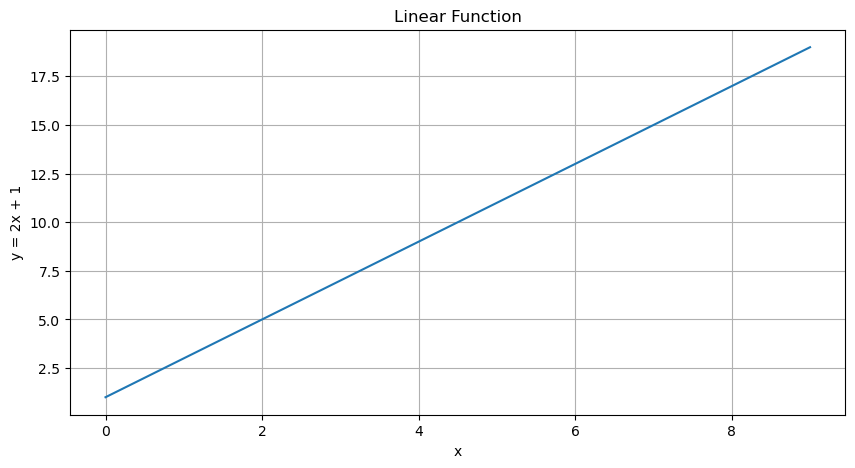

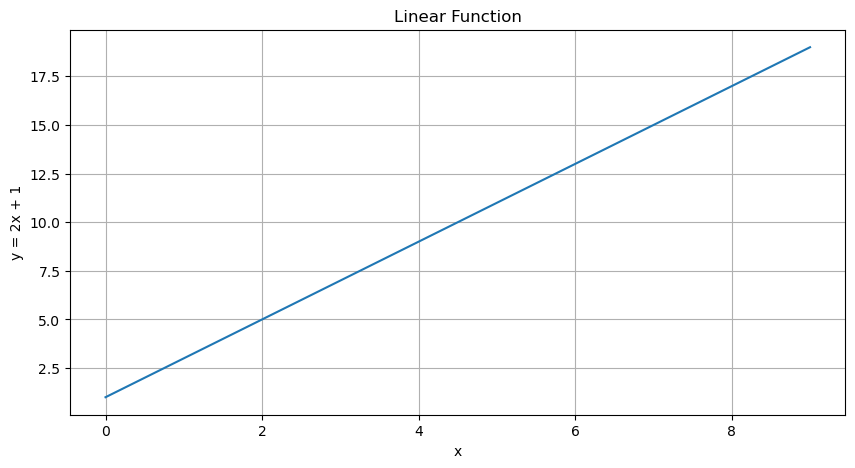

In [2]:
# Non-OOP method using pyplot
x = np.arange(0, 10, 1)
y = 2 * x + 1

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title('Linear Function')
plt.xlabel('x')
plt.ylabel('y = 2x + 1')
plt.grid(True)
plt.show()

# OOP method
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y)
ax.set_title('Linear Function')
ax.set_xlabel('x')
ax.set_ylabel('y = 2x + 1')
ax.grid(True)
plt.show()

Next, let's look at how to plot a scatter plot with Matplotlib.

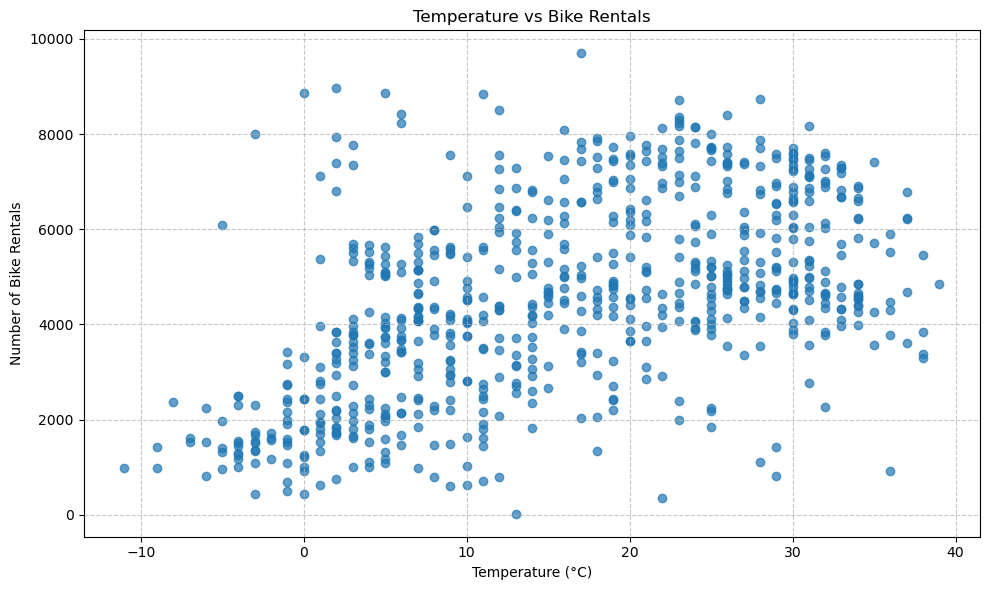

In [3]:
# Load the dataset
df = pd.read_csv('data/bikeshare-messy.csv')

# Select two numerical columns for the scatter plot
x = df['temp']
y = df['count']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Temperature vs Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Bike Rentals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Next, let's look at how to plot a histogram with Matplotlib.

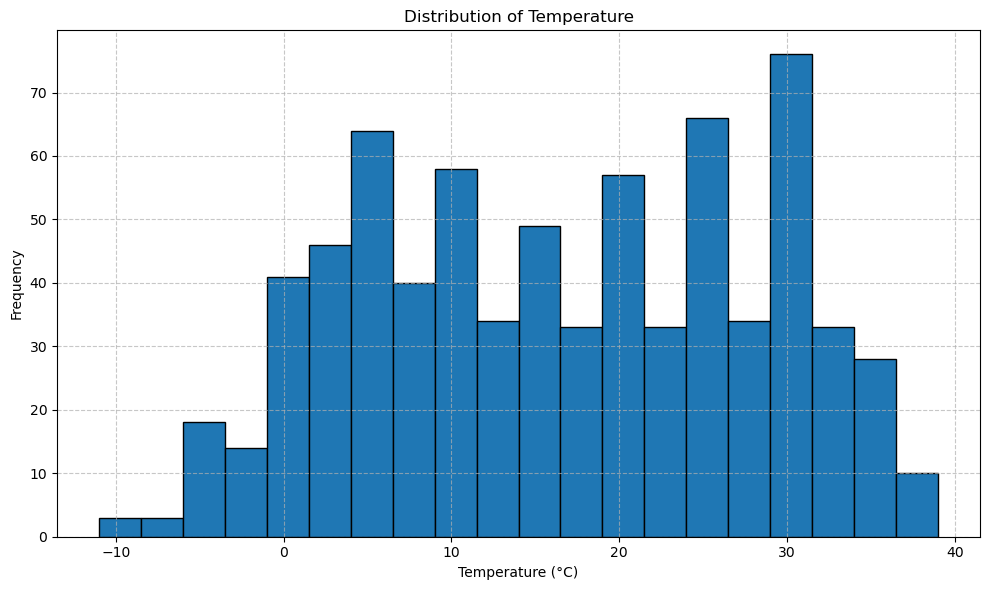

In [4]:
# Select a numerical column for the histogram
data = df['temp']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Matplotlib - Subplots <a id='part2'></a>

Matplotlib provides powerful tools for creating subplots using the plt.subplots() function. This function returns a figure object and an array of axes objects, which can be used to create multiple plots within a single figure. The subplots() function takes arguments for the number of rows and columns of subplots, as well as optional parameters for figsize and other layout options. Each subplot can be accessed and customized individually using the axes objects, allowing for diverse visualizations within one figure.

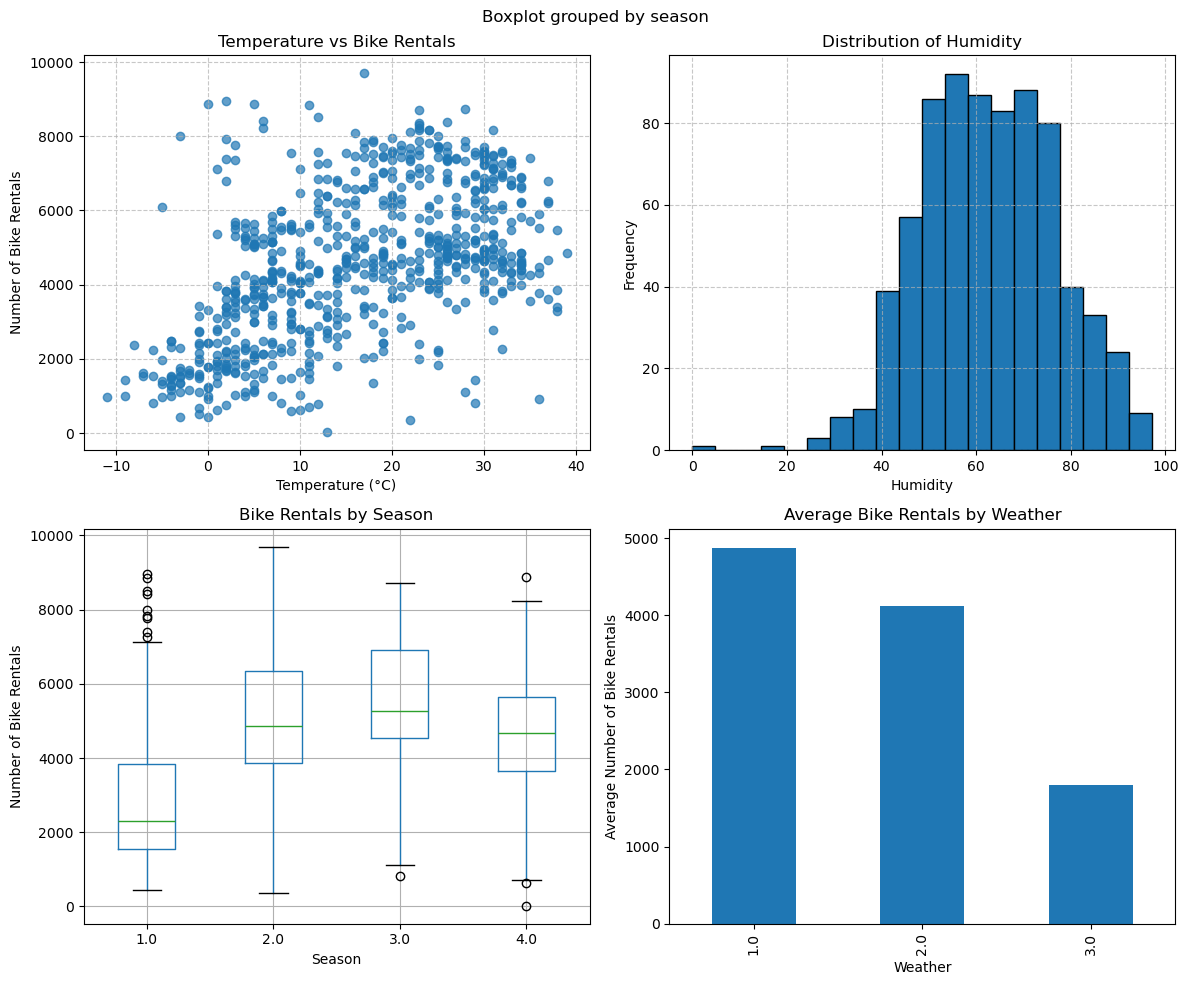

In [5]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot 1: Scatter plot (Temperature vs Count)
axs[0].scatter(df['temp'], df['count'], alpha=0.7)
axs[0].set_title('Temperature vs Bike Rentals')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Number of Bike Rentals')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Histogram (Humidity)
axs[1].hist(df['humidity'], bins=20, edgecolor='black')
axs[1].set_title('Distribution of Humidity')
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Frequency')
axs[1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Box plot (Count by Season)
df.boxplot(column='count', by='season', ax=axs[2])
axs[2].set_title('Bike Rentals by Season')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Number of Bike Rentals')

# Plot 4: Bar plot (Average Count by Weather)
avg_count = df.groupby('weather')['count'].mean()
avg_count.plot(kind='bar', ax=axs[3])
axs[3].set_title('Average Bike Rentals by Weather')
axs[3].set_xlabel('Weather')
axs[3].set_ylabel('Average Number of Bike Rentals')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


We can also use plt.subplot() to create individual subplots. To explain a bit more about the difference between plt.subplot() and plt.subplots(), let's look at the following:
- **plt.subplot():**
    - Used to create a single subplot within a figure
    - Typically used when adding subplots one at a time
    - Returns a single Axes object
    - Syntax: plt.subplot(nrows, ncols, index)
- **plt.subplots():**
    - Used to create multiple subplots at once
    - Returns a tuple containing the Figure object and an array of Axes objects
    - More convenient for creating a grid of subplots
    - Syntax: fig, axs = plt.subplots(nrows, ncols)

Both methods can achieve similar results, but plt.subplots() is often preferred for its convenience when creating multiple subplots, while plt.subplot() offers more flexibility for creating subplots with varying layouts or adding subplots incrementally.

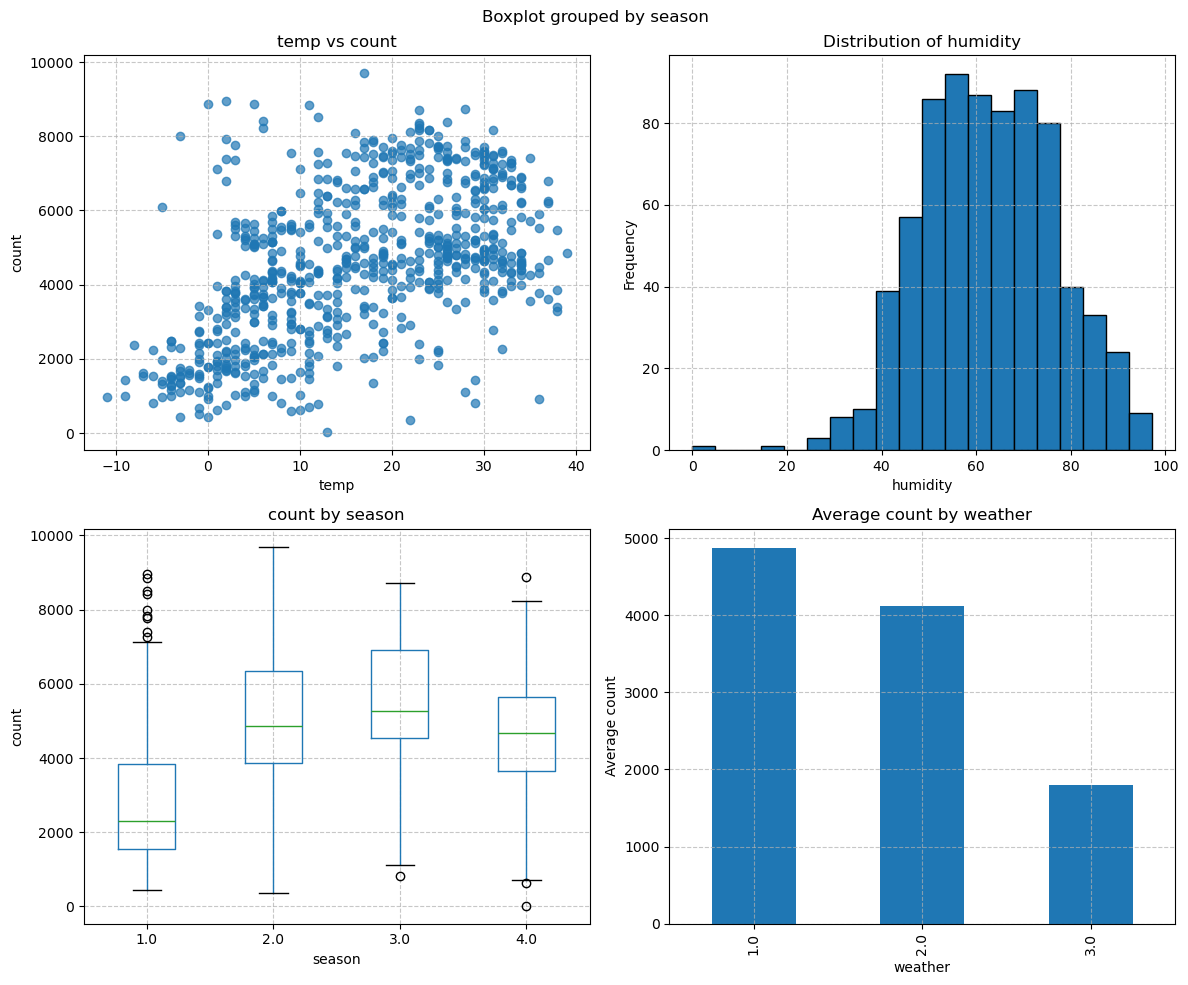

In [6]:
# Create a figure
fig = plt.figure(figsize=(12, 10))

# Define the number of subplots
num_plots = 4

# List of plot types and their corresponding data
plot_types = [
    ('scatter', 'temp', 'count'),
    ('hist', 'humidity'),
    ('box', 'count', 'season'),
    ('bar', 'weather', 'count')
]

for i, plot_info in enumerate(plot_types, 1):
    # Create each subplot
    ax = plt.subplot(2, 2, i)
    
    plot_type = plot_info[0]
    
    if plot_type == 'scatter':
        ax.scatter(df[plot_info[1]], df[plot_info[2]], alpha=0.7)
        ax.set_title(f'{plot_info[1]} vs {plot_info[2]}')
        ax.set_xlabel(plot_info[1])
        ax.set_ylabel(plot_info[2])
    elif plot_type == 'hist':
        ax.hist(df[plot_info[1]], bins=20, edgecolor='black')
        ax.set_title(f'Distribution of {plot_info[1]}')
        ax.set_xlabel(plot_info[1])
        ax.set_ylabel('Frequency')
    elif plot_type == 'box':
        df.boxplot(column=plot_info[1], by=plot_info[2], ax=ax)
        ax.set_title(f'{plot_info[1]} by {plot_info[2]}')
        ax.set_xlabel(plot_info[2])
        ax.set_ylabel(plot_info[1])
    elif plot_type == 'bar':
        avg_data = df.groupby(plot_info[1])[plot_info[2]].mean()
        avg_data.plot(kind='bar', ax=ax)
        ax.set_title(f'Average {plot_info[2]} by {plot_info[1]}')
        ax.set_xlabel(plot_info[1])
        ax.set_ylabel(f'Average {plot_info[2]}')
    
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## Seaborn: Higher level plotting <a id='part3'></a>

Seaborn is a high-level library built on top of Matplotlib that introduces easier ways to plot beautiful figures using pandas dataframes. Compared to Matplotlib, Seaborn offers more aesthetically pleasing default styles and color palettes, as well as built-in themes for quickly creating complex visualizations with less code.

Here are some examples of how to use Seaborn to create different types of plots for more detailed visualizations.

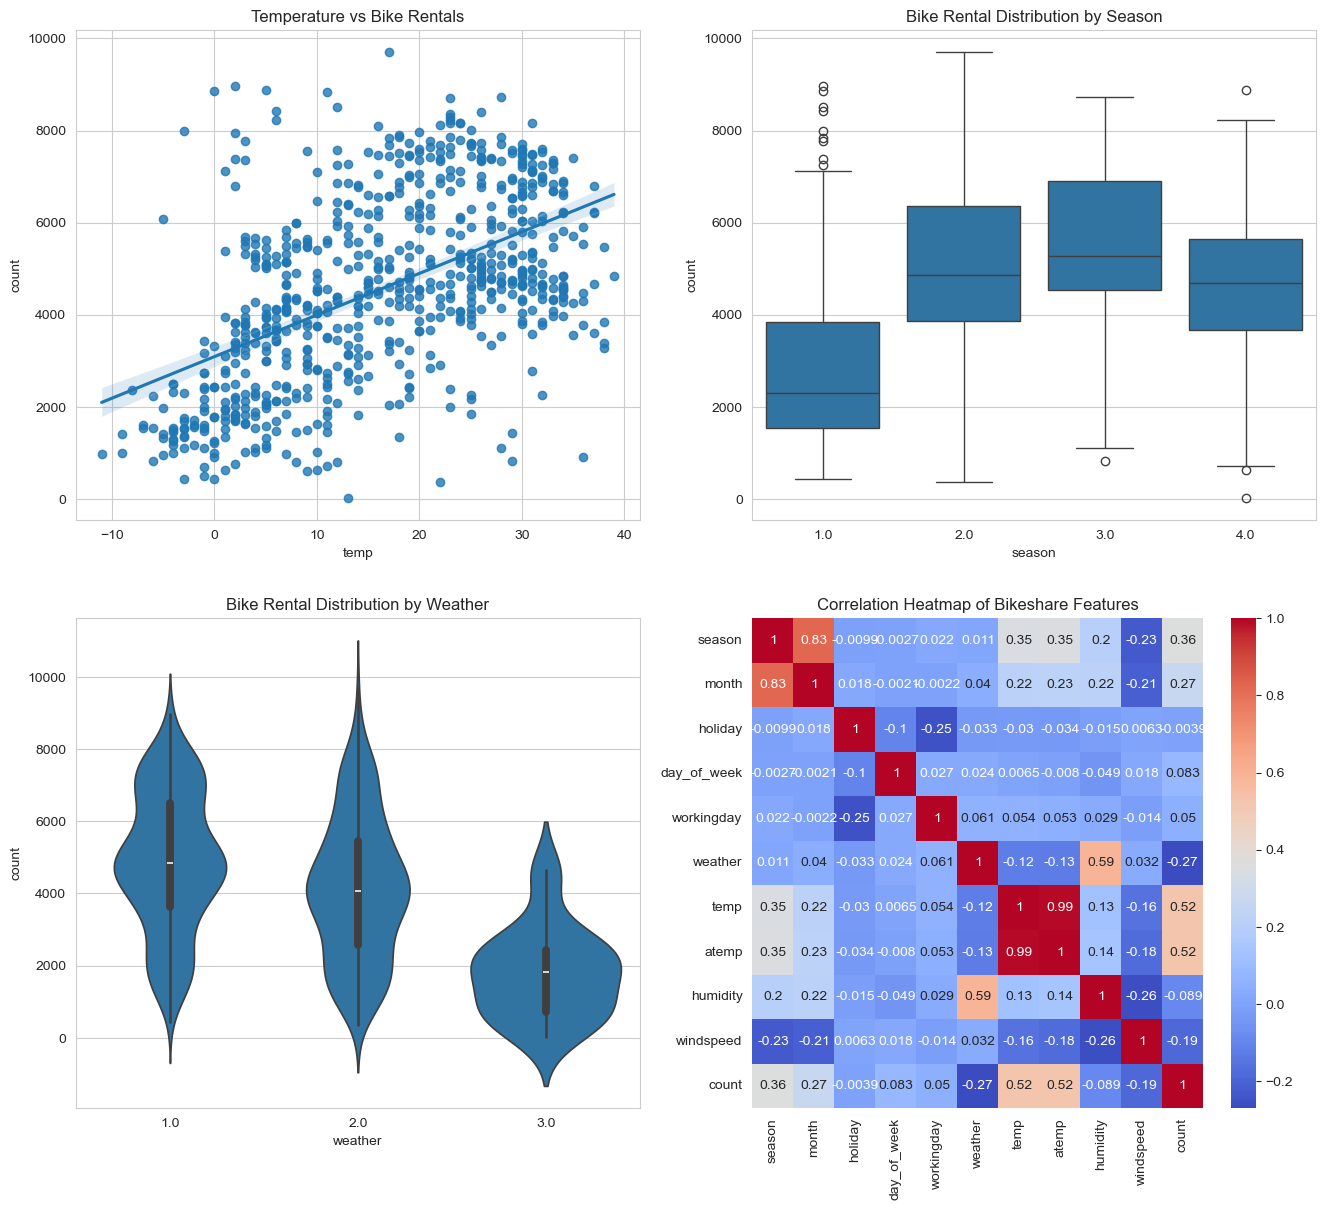

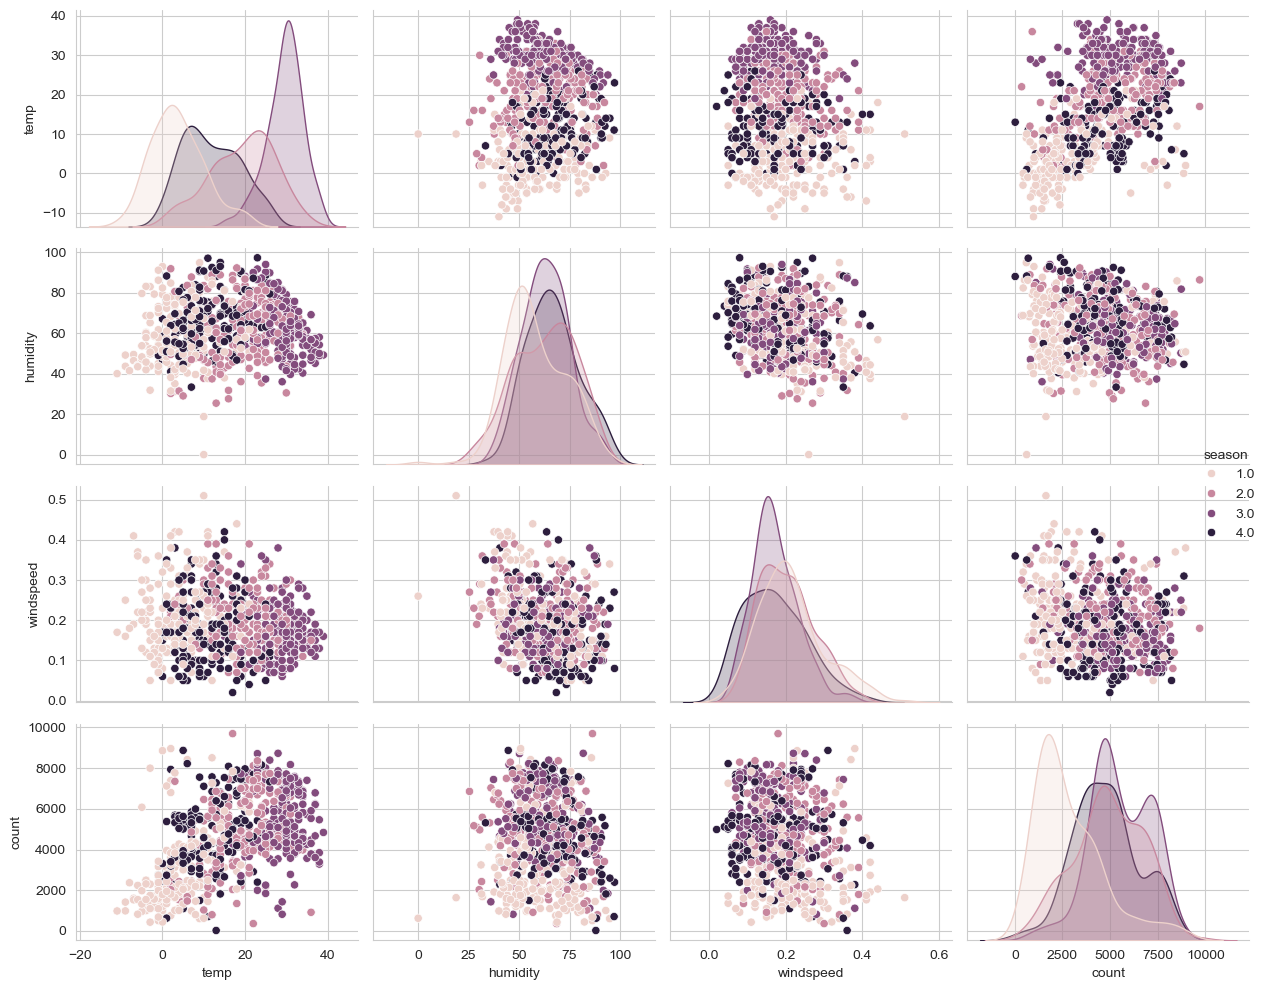

In [7]:
import seaborn as sns

# Set the style for all subsequent plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Flatten the axes array for easier indexing
axes = axes.flatten()
# 1. Scatter plot with regression line
sns.regplot(x='temp', y='count', data=df, ax=axes[0])
axes[0].set_title('Temperature vs Bike Rentals')

# 2. Box plot
sns.boxplot(x='season', y='count', data=df, ax=axes[1])
axes[1].set_title('Bike Rental Distribution by Season')

# 3. Violin plot
sns.violinplot(x='weather', y='count', data=df, ax=axes[2])
axes[2].set_title('Bike Rental Distribution by Weather')

# 4. Heatmap of correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[3])
axes[3].set_title('Correlation Heatmap of Bikeshare Features')

# 5. Pair plot (this will create its own figure)
sns.pairplot(df[['season', 'temp', 'humidity', 'windspeed', 'count']], hue='season', height=2.5, aspect=1.2)

# Adjust the layout of the main figure
plt.tight_layout()

# Show all plots
plt.show()